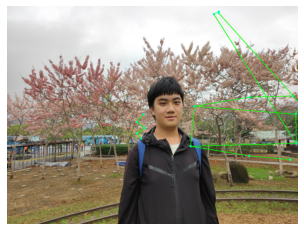

In [100]:
import tensorflow as tf
import tensorflow_hub as hub
import cv2
import matplotlib.pyplot as plt

# Load the MoveNet model
model_url = "https://tfhub.dev/google/movenet/singlepose/lightning/3"
model = hub.load(model_url)

# Load and preprocess the image
image_path = "D:/life.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Resize the image to the model's input size (192x192)
input_image = tf.image.resize(image_rgb, (192, 192))
input_image = tf.expand_dims(input_image, axis=0)  # Add a batch dimension
input_image = tf.cast(input_image, tf.int32)  # Convert the image to int32 data type

# Perform pose estimation using the 'serving_default' signature
results = model.signatures["serving_default"](input_image)

# Use the correct key to get the pose keypoints
# Replace 'output_0' with the correct key if needed
keypoints = results['output_0'][0].numpy()

# Draw poses on the image
image_with_poses = image_rgb.copy()
for keypoint in keypoints:
    for kp in keypoint:
        y, x = int(kp[1] * image_rgb.shape[0]), int(kp[0] * image_rgb.shape[1])
        cv2.circle(image_with_poses, (x, y), 5, (0, 255, 255), -1)

# Define the connections between keypoints for drawing skeleton
connections = [(0, 1), (1, 3), (0, 2), (2, 4), (5, 7), (7, 9), (6, 8), (8, 10), (5, 6), (5, 11), (6, 12),
               (11, 12), (11, 13), (12, 14), (13, 15), (14, 16)]

# Draw skeleton lines
for keypoint in keypoints:
    for connection in connections:
        start_point = (int(keypoint[connection[0]][0] * image_rgb.shape[1]), int(keypoint[connection[0]][1] * image_rgb.shape[0]))
        end_point = (int(keypoint[connection[1]][0] * image_rgb.shape[1]), int(keypoint[connection[1]][1] * image_rgb.shape[0]))
        cv2.line(image_with_poses, start_point, end_point, (0, 255, 0), 2)

# Display the image with poses
plt.imshow(image_with_poses)
plt.axis('off')
plt.show()


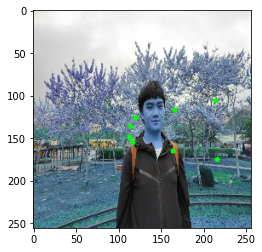

In [99]:
import tensorflow as tf
import tensorflow_hub as hub
import cv2
import matplotlib.pyplot as plt

# Load the MoveNet model from TensorFlow Hub
model_path = "https://tfhub.dev/google/movenet/singlepose/thunder/3"
model = hub.load(model_path)

# Load and preprocess the image
image_path = 'D:/life.jpg'
input_image = tf.io.read_file(image_path)
input_image = tf.image.decode_image(input_image)
input_image = tf.image.resize(input_image, (256, 256))
input_image = tf.cast(input_image, tf.float32)  # Convert to float32 data type
input_image = input_image / 255.0  # Normalize to range [0, 1]
input_image = tf.expand_dims(input_image, axis=0)

# Perform pose estimation using the 'serving_default' signature
results = model.signatures["serving_default"](input=tf.cast(input_image * 255, tf.int32))  # Convert back to int32 for input

# Use the correct key to get the pose keypoints
keypoints = results["output_0"].numpy()

# Process the keypoints as needed
# ...

# Draw the keypoints on the input image
output_image = cv2.cvtColor(input_image[0].numpy(), cv2.COLOR_RGB2BGR)

for person_keypoints in keypoints[0]:
    for keypoint in person_keypoints:
        x, y, score = keypoint
        if score > 0.5:  # Only draw keypoints with high confidence
            cv2.circle(output_image, (int(x * output_image.shape[1]), int(y * output_image.shape[0])), 3, (0, 255, 0), -1)

# Display the output image
plt.imshow(output_image)
plt.show()


In [1]:
import cv2
import math

path = 'life.jpg'
img = cv2.imread(path)
pointList = []

def getAngle(pt1, pt2, pt3):
    dx1 = pt2[0] - pt1[0]
    dy1 = pt2[1] - pt1[1]
    dx2 = pt3[0] - pt1[0]
    dy2 = pt3[1] - pt1[1]
    
    angle = math.atan2(dy2, dx2) - math.atan2(dy1, dx1)
    angle = math.degrees(angle)
    
    if angle < 0:
        angle += 360
    
    if angle > 180:
        angle = 360 - angle
    
    return angle

def mousepoints(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDOWN:
        pointList.append([x, y])
        size = len(pointList)
        
        if size % 3 == 0 and size != 0:
            cv2.line(img, tuple(pointList[size - 3]), tuple(pointList[size - 2]), (0, 0, 255), 2)
            cv2.line(img, tuple(pointList[size - 3]), tuple(pointList[size - 1]), (0, 0, 255), 2)
            angle = getAngle(pointList[size - 3], pointList[size - 2], pointList[size - 1])
            print(angle)
            cv2.putText(img, str(round(angle, 2)), tuple(pointList[size - 3]), cv2.FONT_HERSHEY_DUPLEX, 1, (255, 0, 0), 2)
        cv2.circle(img, (x, y), 5, (0, 0, 255), cv2.FILLED)

while True:
    cv2.imshow('img', img)
    cv2.setMouseCallback('img', mousepoints)
    
    key = cv2.waitKey(1) & 0xFF
    if key == ord('d'):
        pointList = []
        cv2.destroyAllWindows()
        break
    elif key == ord('q'):
        pointList = []
        img = cv2.imread(path)


91.518386786836
34.46647325139418
59.62817312394992
92.55028163868815
41.613358311707564
